In [1]:
import pandas as pd
import seaborn as sns
from preprocess import Audio_Processor
import matplotlib.pyplot as plt

In [2]:
path_to_db='../ESC-50/'
preprocess = Audio_Processor(path_to_db + 'audio/')
sample_rate = 1000

In [3]:
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')
classes = [None] * 50
h_classes = ['animal', 'nature', 'human', 'domestic', 'urban']

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [4]:
test_file = pd.DataFrame(preprocess.preprocess('2-102414-A-17.wav'))
test_file.head()

/usr/local/lib/python3.5/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


0          1          2          3          4          5   \
0  21.927575  20.290780  18.206072  16.158445  14.273799  12.354932   
1  22.382184  21.468147  20.070725  18.335122  16.396533  14.348357   
2  23.721630  22.750234  21.206390  19.194400  16.844600  14.300204   
3  27.081467  25.569413  23.217595  20.250900  16.935373  13.542076   
4  27.904973  25.317398  21.752548  18.017817  14.759908  12.250736   

          6          7         8         9     ...           28        29  \
0  10.169572   7.719307  5.262192  3.099848    ...    -0.344654 -0.187106   
1  12.234242  10.065163  7.851280  5.631985    ...    -0.344654 -0.187106   
2  11.703585   9.183705  6.846216  4.767270    ...    -0.344654 -0.187106   
3  10.314547   7.444653  5.058995  3.215542    ...    -0.344654 -0.187106   
4  10.353642   8.674094  6.814273  4.605797    ...    -0.344654 -0.187106   

         30        31        32       33        34        35        36  \
0 -0.021905  0.098325  0.138104  0.10235  0.031212 -0.030292 -0.064038   
1 -0.021905  0.098325  0.138104  0.10235  0.031212 -0.030292 -0.064038   
2 -0.021905  0.098325  0.138104  0.10235  0.031212 -0.030292 -0.064038   
3 -0.021905  0.098325  0.138104  0.10235  0.031212 -0.030292 -0.064038   
4 -0.021905  0.098325  0.138104  0.10235  0.031212 -0.030292 -0.064038   

         37  
0 -0.087119  
1 -0.087119  
2 -0.087119  
3 -0.087119  
4 -0.087119  

[5 rows x 38 columns]

In [5]:
dataset['h_category'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    if target < 10:
        dataset.loc[index, 'h_category'] = 0
    elif target < 20:
        dataset.loc[index, 'h_category'] = 1
    elif target < 30:
        dataset.loc[index, 'h_category'] = 2
    elif target < 40:
        dataset.loc[index, 'h_category'] = 3
    elif target < 50:
        dataset.loc[index, 'h_category'] = 4

## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [6]:
c_data = pd.concat([preprocess.preprocess_fold(fld, dataset)
                    for fld in range(1,6)],
                   ignore_index=True)

In [7]:
c_data.shape

(388743, 39)

# Some statistics
We have a lot of negatives when compared to positives when training shallow nets, if improving accuracy it will naturally gravitate toward guessing 0
## Distribution of MFCCs
Distribution for all 50 classes

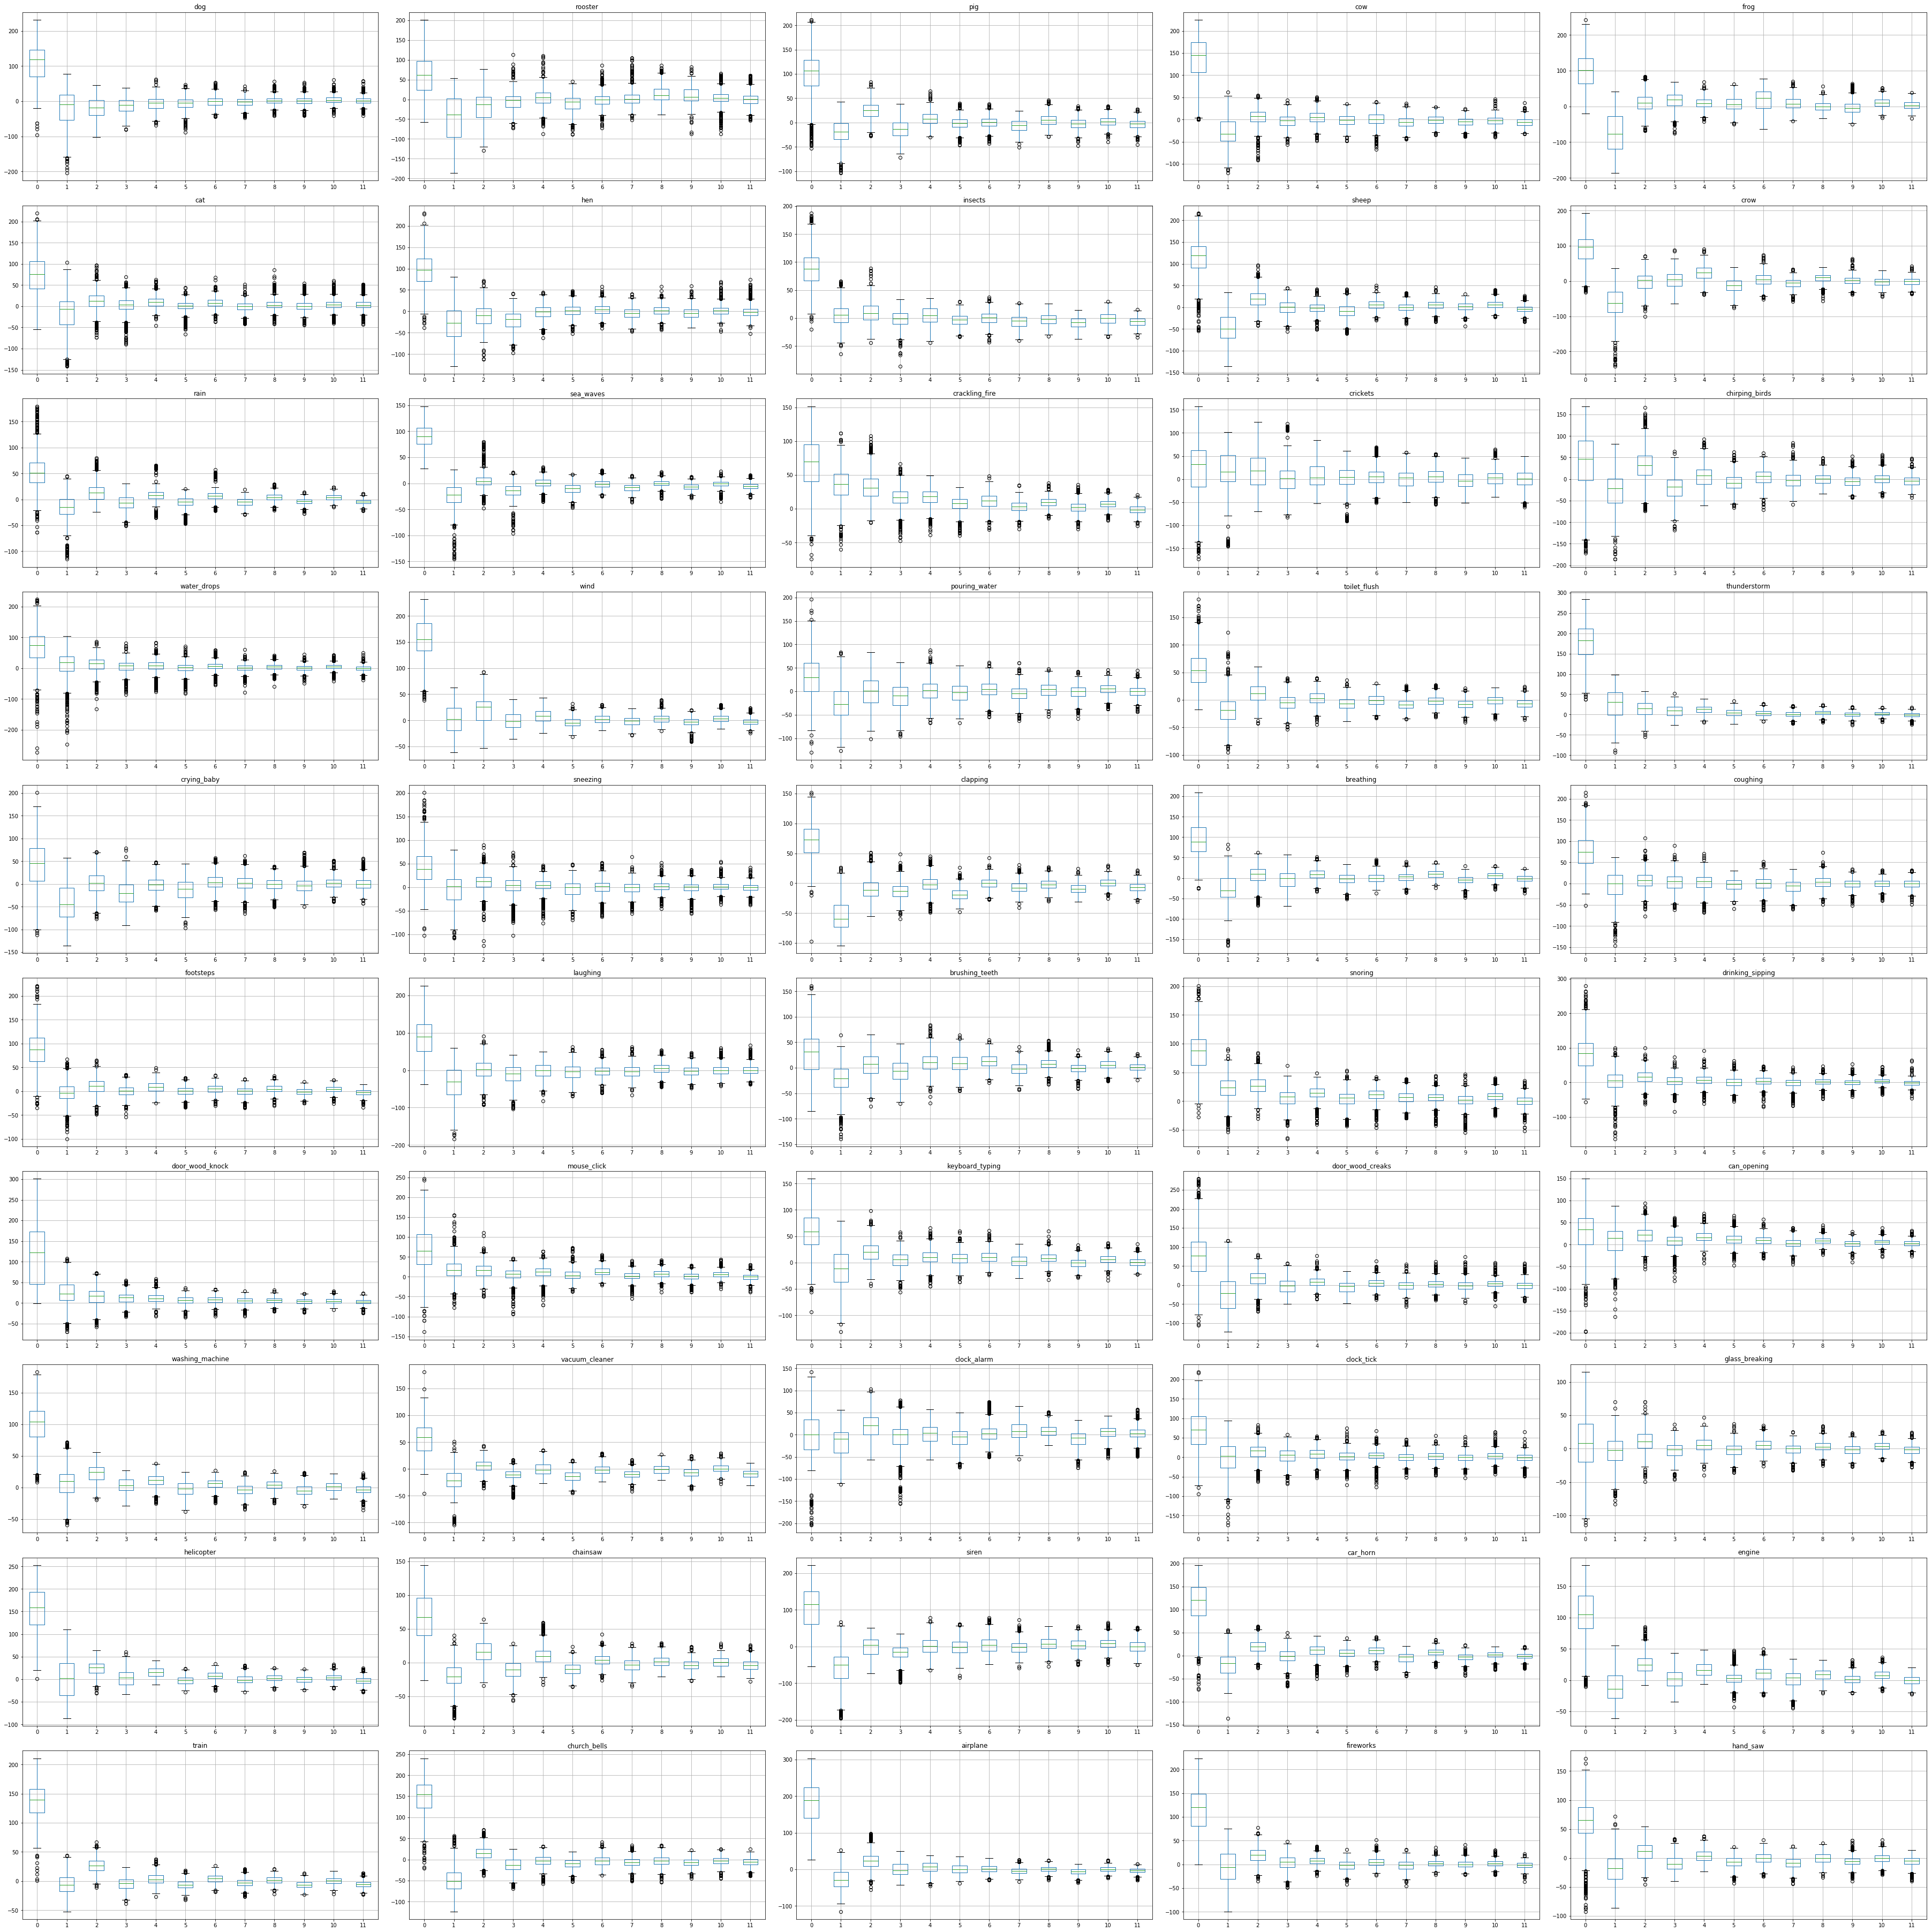

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i = 0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[0:12]].sample(sample_rate).boxplot(ax=ax)
    i+=1

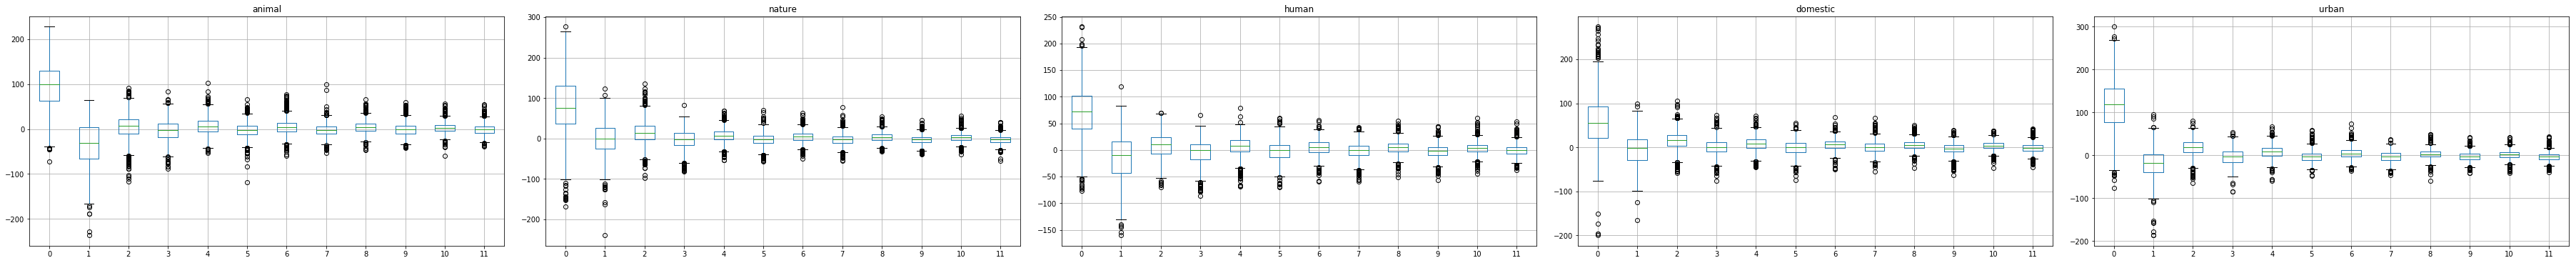

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[0:12]].sample(sample_rate).boxplot(ax=ax)
    i+=1

## Distribution of MFCC'

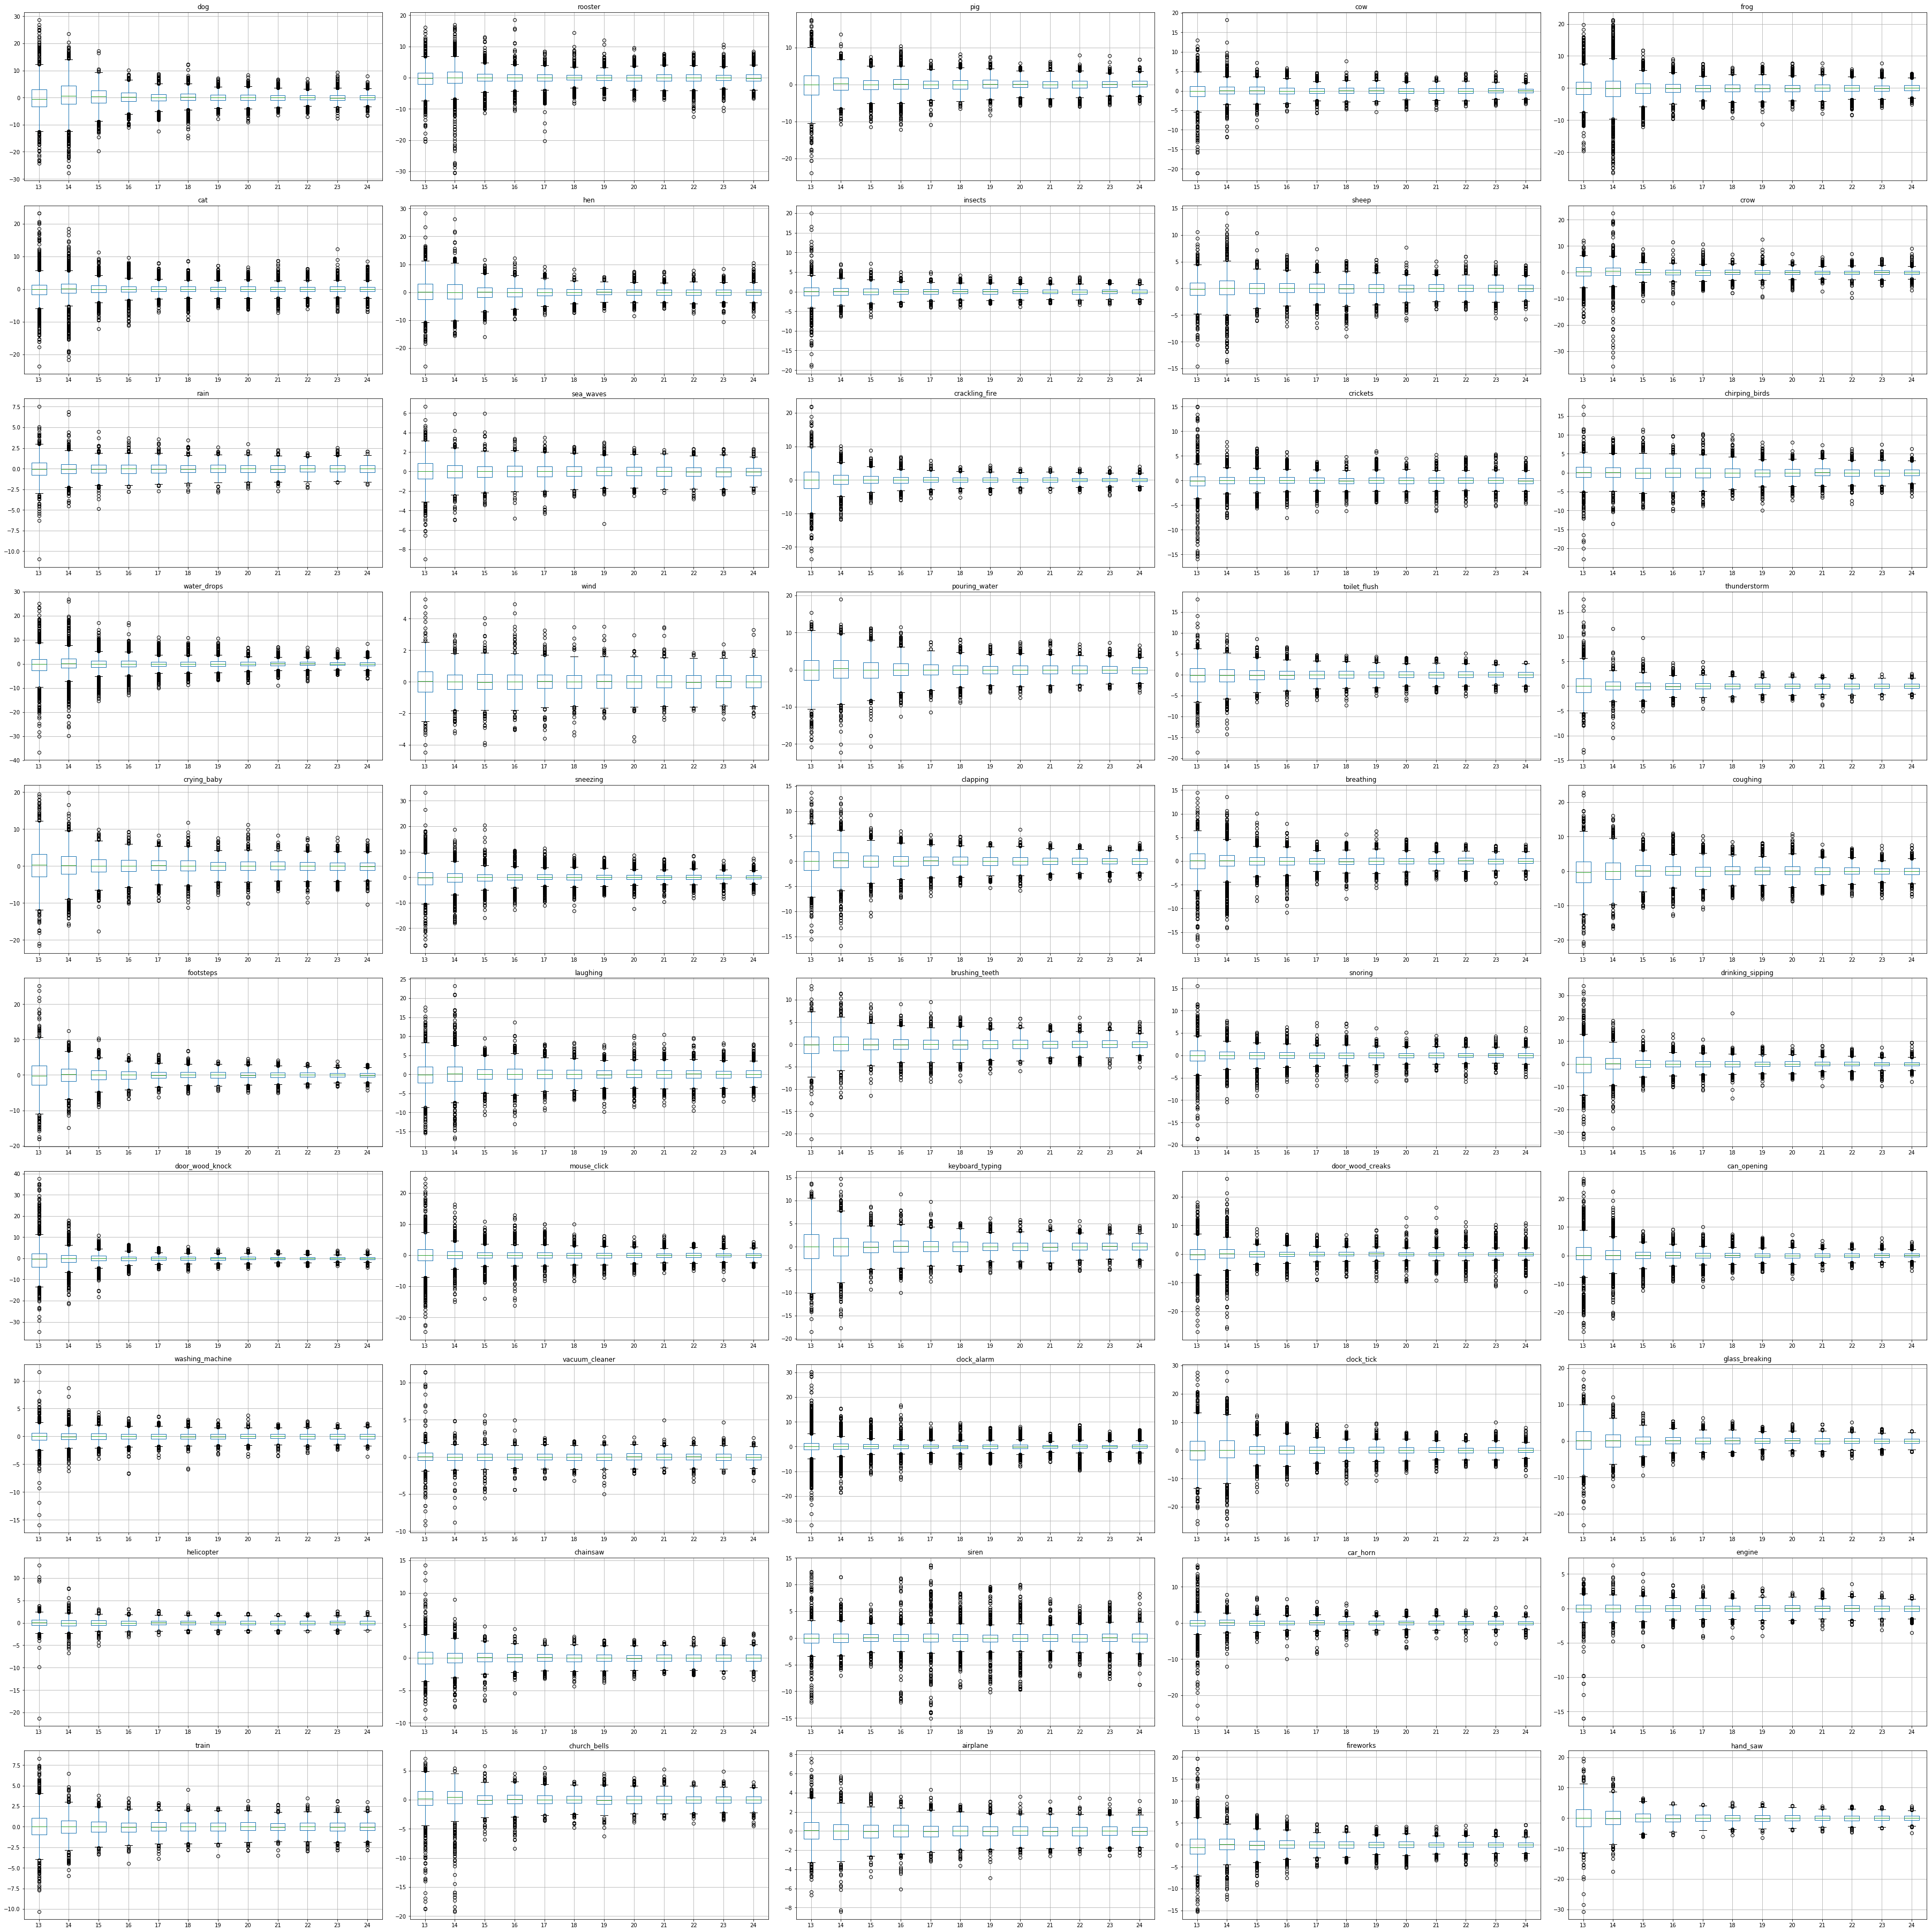

In [10]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[13:25]].sample(sample_rate).boxplot(ax=ax)
    i+=1

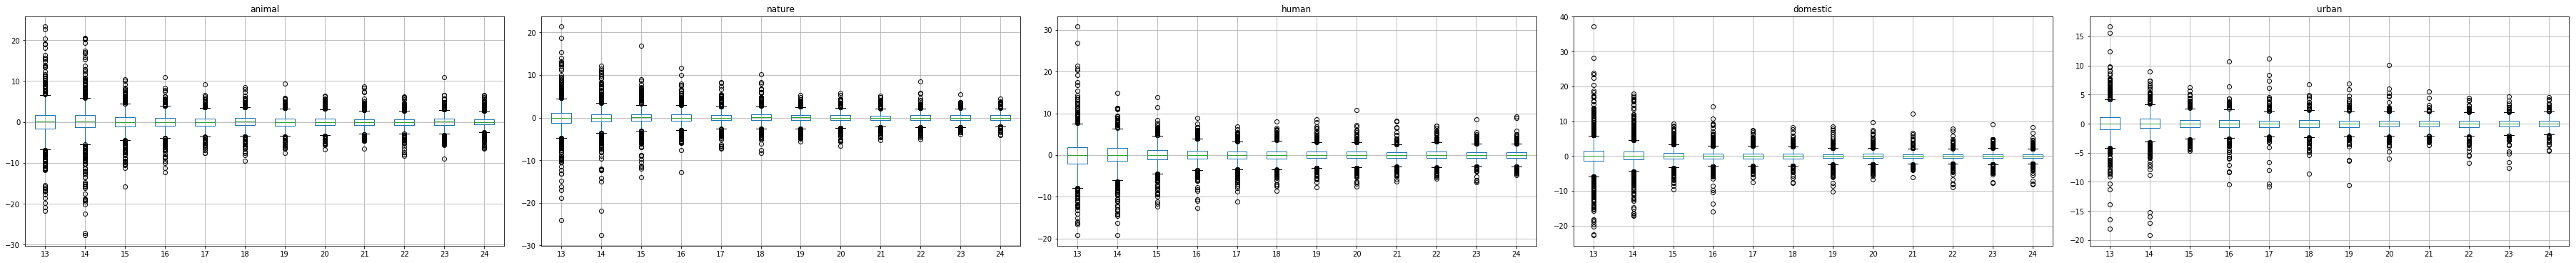

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[13:25]].sample(sample_rate).boxplot(ax=ax)
    i+=1

## Distribution of MFCC''

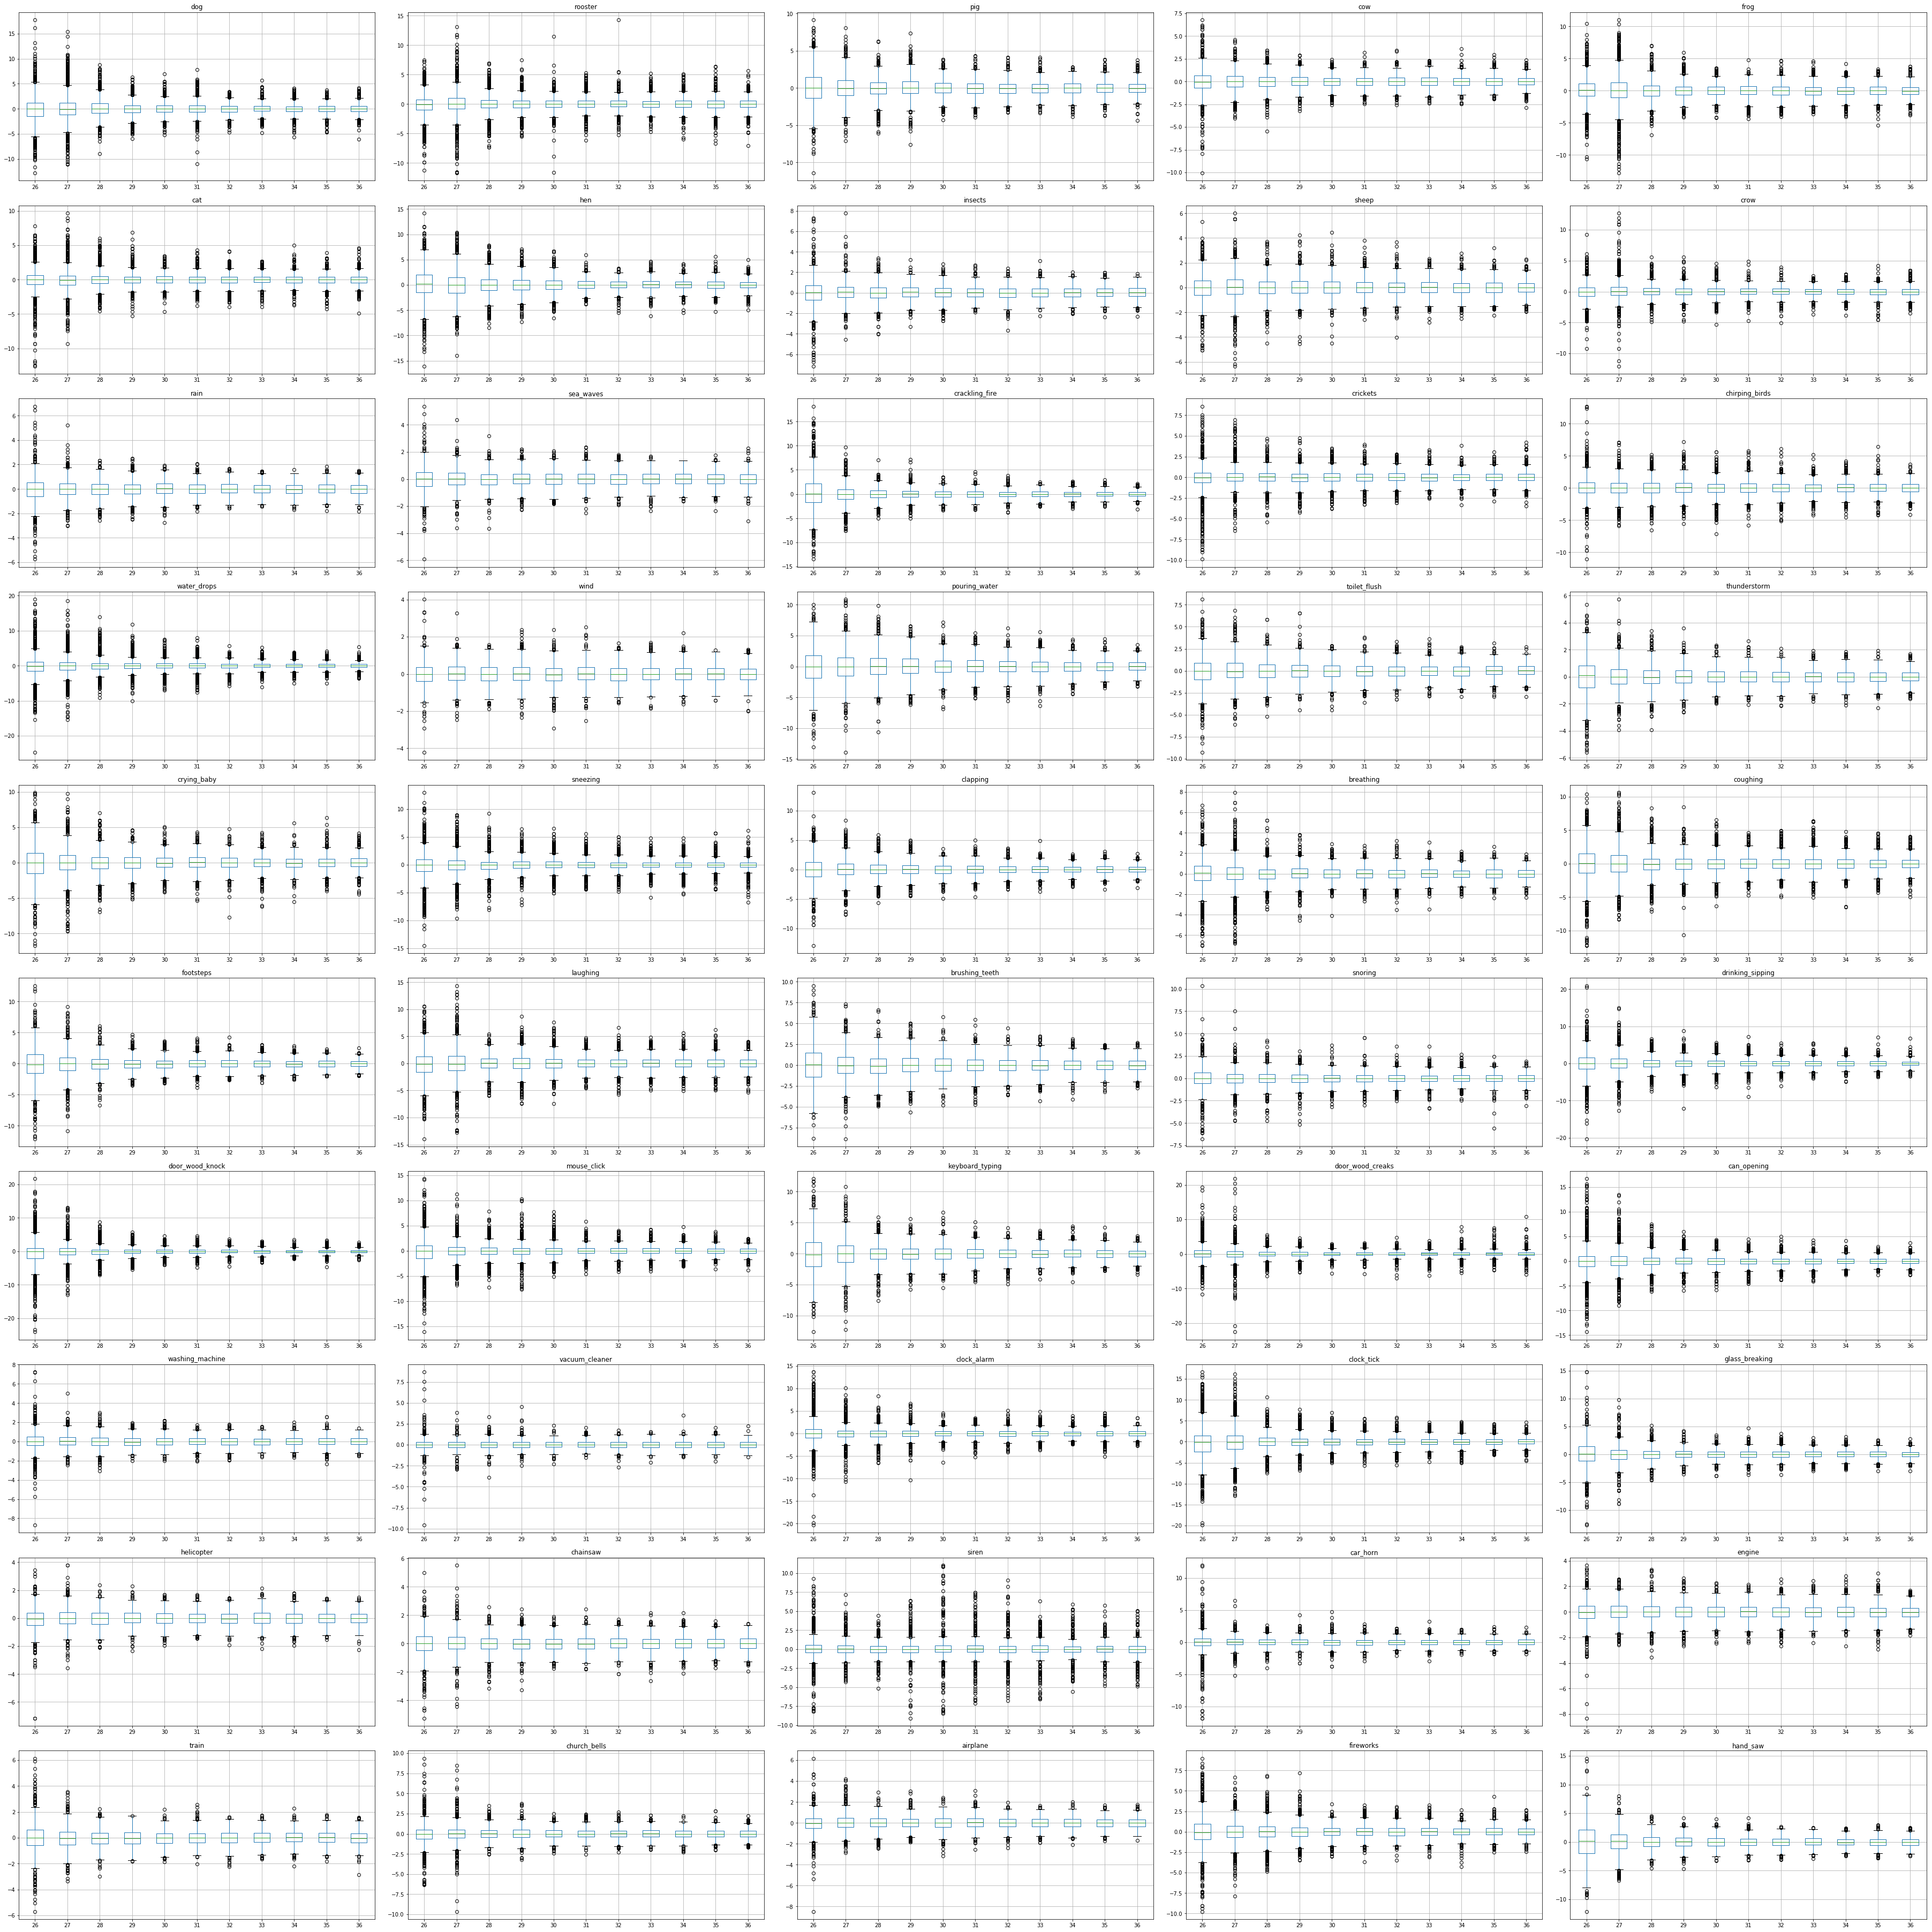

In [12]:
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(50,50), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(classes[i])
    (c_data[c_data.target == i])[c_data.columns[26:37]].sample(sample_rate).boxplot(ax=ax)
    i+=1

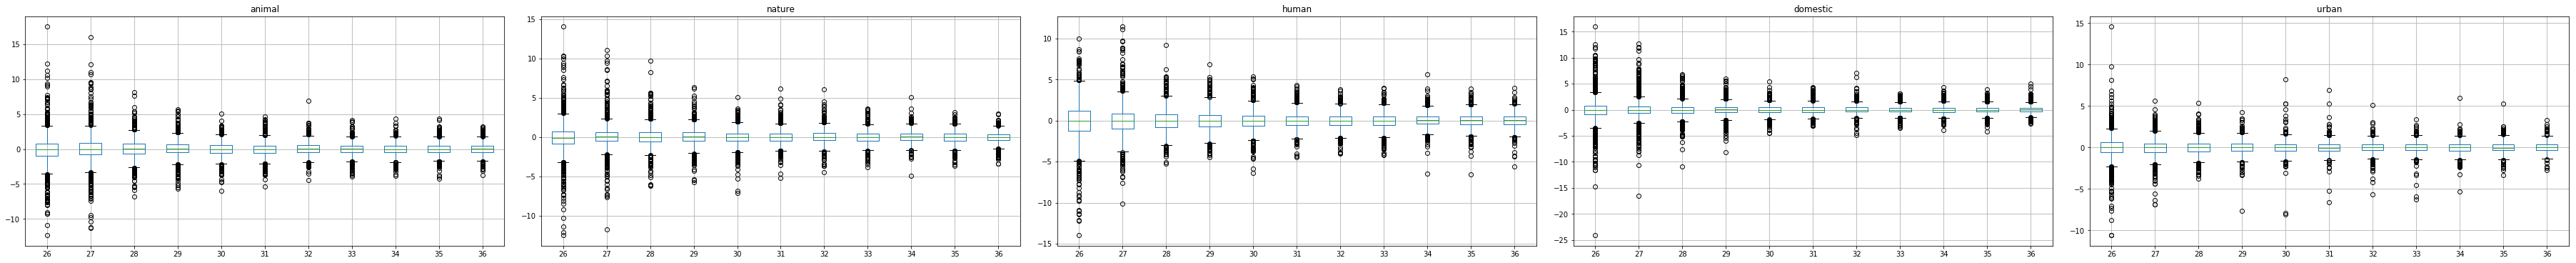

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    start_i = i * 10
    end_i = ((i + 1) * 10) - 1
    (c_data[c_data.target.between(start_i, end_i)])[c_data.columns[26:37]].sample(sample_rate).boxplot(ax=ax)
    i+=1

In [8]:
mapping = {
    'dog': 0,
    'rooster': 0,
    'pig': 0,
    'cow': 0,
    'frog': 0,
    'cat': 0,
    'hen': 0,
    'insects': 0,
    'sheep': 0,
    'crow': 0,
    'rain': 1,
    'sea_waves': 1,
    'crackling_fire': 1,
    'crickets': 0,
    'chirping_birds': 0,
    'water_drops': 1,
    'wind': 1,
    'pouring_water': 1,
    'toilet_flush': 1,
    'thunderstorm': 1,
    'crying_baby': 0,
    'sneezing': 0,
    'clapping': 0,
    'breathing': 0,
    'coughing': 0,
    'footsteps': 1,
    'laughing': 0,
    'brushing_teeth': 1,
    'snoring': 0,
    'drinking_sipping': 1,
    'door_wood_knock': 1,
    'mouse_click': 1,
    'keyboard_typing': 1,
    'door_wood_creaks': 1,
    'can_opening': 1,
    'washing_machine': 1,
    'vacuum_cleaner': 1,
    'clock_alarm': 1,
    'clock_tick': 1,
    'glass_breaking':1 ,
    'helicopter': 1,
    'chainsaw': 1,
    'siren': 1,
    'car_horn': 1,
    'engine': 1,
    'train': 1,
    'church_bells': 1,
    'airplane': 1,
    'fireworks': 1,
    'hand_saw': 1,
}
h_classes = ['Human & Animal', 'Interacting Materials']

In [ ]:
c_data['h_category'] = None
for index, row in c_data.iterrows():
    target = row['target']
    row['category'] = classes[target]
    c_data.loc[index, 'h_category'] = mapping[row['category']]

In [ ]:
c_data.head()

TypeError: list indices must be integers or slices, not Series

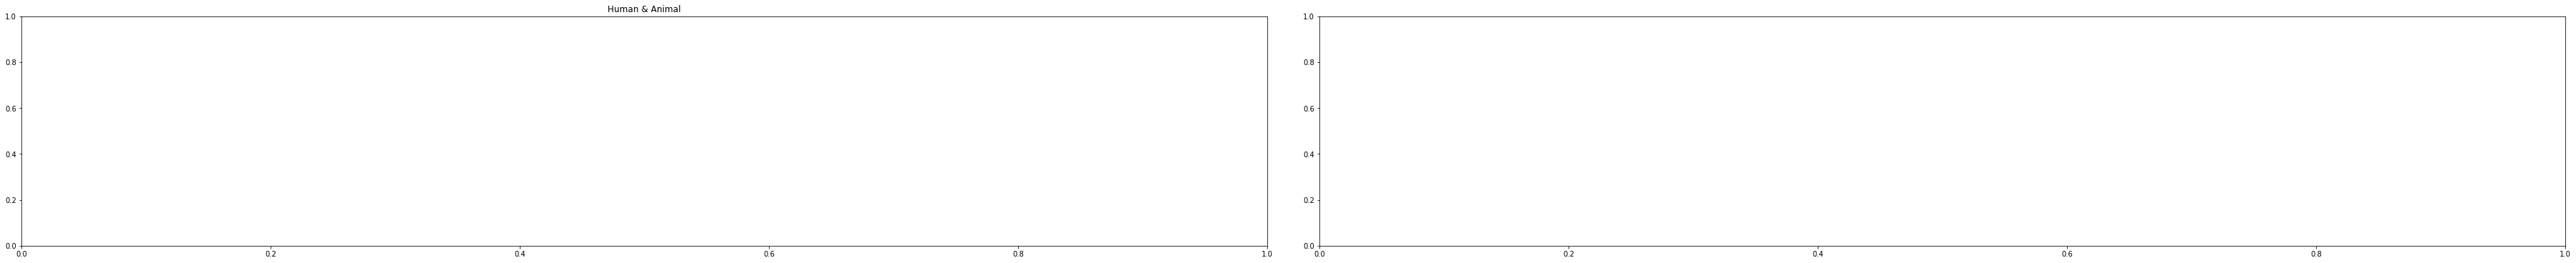

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(50,5), constrained_layout=True)

i=0
for ax in axs.flatten():
    ax.set_title(h_classes[i])
    (c_data[mapping[c_data.target] == i])[c_data.columns[0:12]].sample(sample_rate).boxplot(ax=ax)
    i+=1